# Analysis of Quotation Data Generated from JSTOR Dataset

This Notebook allows you to browse and analyze data on quotations from JSTOR generated from the notebook in "02-detect-quotations".

You'll need to run all the cells under "Initial setup". Remaining sections can be run independently of each other, depending on which questions you want to ask.

Any time your input is needed, a cell will begin with "# ACTION:"

Optional cells begin with "# OPTIONAL:" - if you don't want to take this option, don't run the cell.

# Table of contents

- [Terminology](#Terminology)
- [Initial setup](#Initial-setup)
- [Basic information about results](#Basic-information-about-results)
- [Information about historical range](#Information-about-historical-range)
- [Questions about distribution of quotations across source text](#Questions-about-distribution-of-quotations-across-source-text)
	- [How many items have quoted from each chunk of the text?](#How-many-items-have-quoted-from-each-chunk-of-the-text?)
	- [How many quotations were detected from each chunk of the text?](#How-many-quotations-were-detected-from-each-chunk-of-the-text?)
	- [How many quoted words were detected from each chunk of the text?](#How-many-quoted-words-were-detected-from-each-chunk-of-the-text?)
	- [How does the number of items quoting each chunk change over the decades?](#How-does-the-number-of-items-quoting-each-chunk-change-over-the-decades?)
	- [How does the number of quotations from each chunk change over the decades?](#How-does-the-number-of-quotations-from-each-chunk-change-over-the-decades?)
	- [How does the number of words quoted from each chunk change over the decades?](#How-does-the-number-of-words-quoted-from-each-chunk-change-over-the-decades?)
- [Questions about frequently quoted passages](#Questions-about-frequently-quoted-passages)
	- [What are the most frequently quoted passages in the text?](#What-are-the-most-frequently-quoted-passages-in-the-text?)
	- [Which frequently-quoted passages have been most consistently quoted over time?](#Which-frequently-quoted-passages-have-been-most-consistently-quoted-over-time?)
	- [Which frequently-quoted passages have undergone the largest change over time?](#Which-frequently-quoted-passages-have-undergone-the-largest-change-over-time?)
	- [Which passages have increased or decreased the most in the last decade (2010s)?](#Which-passages-have-increased-or-decreased-the-most-in-the-last-decade-(2010s)?)
- [Questions about a specific passage](#Questions-about-a-specific-passage)
	- [What is the most frequently quoted portion of this passage?](#What-is-the-most-frequently-quoted-portion-of-this-passage?)
	- [How has the quotation frequency for this passage changed over time?](#How-has-the-quotation-frequency-for-this-passage-changed-over-time?)
	- [What are the items quoting from this passage?](#What-are-the-items-quoting-from-this-passage?)
- [Questions about text quoted](#Questions-about-text-quoted)
	- [What is the distribution of word counts for the quotations detected?](#What-is-the-distribution-of-word-counts-for-the-quotations-detected?)
	- [What are the most frequent words across all quoted passages?](#What-are-the-most-frequent-words-across-all-quoted-passages?)
	- [What are the most distinctive keywords for quoted passages compared to the rest of the text?](#What-are-the-most-distinctive-keywords-for-quoted-passages-compared-to-the-rest-of-the-text?)
- [Question about academic journals](#Question-about-academic-journals)
	- [Which journals account for the largest number of items in the dataset?](#Which-journals-account-for-the-largest-number-of-items-in-the-dataset?)
	- [Which journals account for the largest number of quotations detected?](#Which-journals-account-for-the-largest-number-of-quotations-detected?)
	- [Which journals account for the largest number of words quoted?](#Which-journals-account-for-the-largest-number-of-words-quoted?)
	- [How have the top journals changed over the decades?](#How-have-the-top-journals-changed-over-the-decades?)
	- [What disciplinary affiliations do the journals have based on JSTOR metadata?](#What-disciplinary-affiliations-do-the-journals-have-based-on-JSTOR-metadata?)
	- [What disciplinary affiliations do the journals have based on keywords in titles?](#What-disciplinary-affiliations-do-the-journals-have-based-on-keywords-in-titles?)
	- [How do journals with a specified disciplinary affiliation relate to the rest of the results?](#How-do-journals-with-a-specified-disciplinary-affiliation-relate-to-the-rest-of-the-results?)
	- [How do journals from a specified list of titles relate to the rest of the results?](#How-do-journals-from-a-specified-list-of-titles-relate-to-the-rest-of-the-results?)
	- [What are the most distinctive keywords in quotations from specified journals compared to the rest of the corpus?](#What-are-the-most-distinctive-keywords-in-quotations-from-specified-journals-compared-to-the-rest-of-the-corpus?)
- [Questions about change over time](#Questions-about-change-over-time)
- [Code from previous version of Notebook starts below](#Code-from-previous-version-of-Notebook-starts-below)

# Terminology

|Term | Definition |
|----------|:-------------:|
|**chapter/part/volume** | subdivisions defined in the source text, whether by the author or an editor or publisher|
|**character index**|this is how we specify locations within the source text or any item within the target corpus. each character (e.g. a-z, 0-9, punctuation, spaces) in the text is numbered sequentially, starting at 0. the plural of "index" can be "indices" or "indexes".|
|**chunk**|a portion of the text defined by splitting the text into n equal-sized portions, defined by (character count/word count?)|
|**decade**|groups items in the target corpus by publication date, starting from year ending in 0 and up to year ending in 9, i.e. 1980s is 1980-1989.|
|**item**|each discrete text in the corpus is called an item - items may be journal articles, book reviews, obituaries, tables of contents, book chapters, etc.|
|**journal**|an academic periodical typically published at a frequency somewhere between quarterly and yearly - most of the items in our corpora come from journals|
|**quotation**|the verbatim replication of a passage of the source text in an item from the target corpus - near-verbatim replication is also included (see readme on text-matcher code for more info)|
|**paragraph**|a portion of text that is bounded on both sides by two line breaks (\n\n)|
|**passage**|a portion of text, which could be shorter than a sentence or as long as a paragraph|
|**sentence**|a portion of text that is bounded on both sides by period/full stop (.), question mark (?), exclamation mark (!) or line break (\n)|
|**source text**|the text from which you're wanting to detect quotations|
|**target corpus**|the collection of texts in which you're wanting to detect quotations (plural is "corpora")|
|**word**|a string of characters bounded on both sides by a space ( ) or a new line (\n)|

# Initial setup

In [2]:
# import libraries needed
import sys

import pandas as pd
import numpy as np


# TBD: Some of these libraries are relics of earlier notebooks.
# Reactivate any of the following that are needed, delete any that aren't needed.

#import spacy


try:
    import re
except:
    !{sys.executable} -m pip install re
    import re


try:
    import json
except:
    !{sys.executable} -m pip install json
    import json

try:
    import ipywidgets as widgets
except:
    !{sys.executable} -m pip install ipywidgets
    import ipywidgets as widgets

#%pip install altair

try:
    import altair as alt
except:
    !{sys.executable} -m pip install altair
    import altair as alt


try:
    from pathlib import Path
except:
    !{sys.executable} -m pip install pathlib
    from pathlib import Path



# from IPython.display import display

try:
    from IPython.display import display
except:
    !{sys.executable} -m pip install IPython.display
    from IPython.display import display

#new viz library for single-column heatmap    

try:
    import matplotlib.pyplot as plt
except:
    !{sys.executable} -m pip install matplotlib.pyplot
    import matplotlib.pyplot as plt


try:
    from tabulate import tabulate 
except:
    !{sys.executable} -m pip install tabulate
    from tabulate import tabulate

from ipywidgets import Label


import os


try:
    import seaborn as sns 
except:
    !{sys.executable} -m pip install seaborn
    import seaborn as sns

# seaborn not yet   
#import seaborn as sns
#sns.set()
#from nltk.corpus import names
#from collections import Counter
#from matplotlib import pyplot as plt
#%matplotlib inline
#plt.rcParams["figure.figsize"] = [16, 6]
#plt.style.use('ggplot')




In [6]:

# ACTION: copy path to results JSONL file here (filename should end "_results_[hyperparameters].jsonl")
#path_to_JSONL_file = "my_path/to/JSONL_file" 




path_to_JSONL_file= r"C:\Users\bdt\Documents\Data\Joyce\1922_Ulysses\Results\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl"
path_to_JSONL_file2=Path(path_to_JSONL_file)

# Create a text widget for the path input
path_input = widgets.Textarea(
    # 🚨has to be removed 
    value= r"C:\Users\bdt\Documents\Data\Joyce\1922_Ulysses\Results\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl",
    placeholder="Paste the path here",
    description="Path:",
    rows=6,
    width= 30)
# Add the instruction line above the input field
instruction_line = widgets.Label("Paste the path below:")


# Create a VBox layout with the path_input widget
panel_layout = widgets.VBox([path_input])

# Create a button widget for the commit action
commit_button = widgets.Button(description="Confirm")
text_label=widgets.Label(value="")
commit_box= widgets.HBox([commit_button, text_label])

panel_layout.children = (instruction_line, path_input, commit_box)

# Define the event handler for the commit button
# Update the commit_button_clicked function


def input_field_changed(change):
    new_path = change['new']
    new_path = new_path.replace("\\", "\\\\")
    new_path = new_path.replace("'", "")
    new_path = new_path.replace('"', '')
    if Path(new_path).exists():
        instruction_line.value = "Paste the path below:"
        text_label.value = 'This path exists'
        commit_button.layout.visibility = 'visible'
        commit_button.description = 'Confirm'
    else:
        commit_button.layout.visibility = 'hidden'
        instruction_line.value = "Please try again. Paste the path below"
        text_label.value = 'This path does not exist'
    
    if Path(new_path).exists():
        instruction_line.value = "Paste the path below:"
        text_label.value = 'This path exists'
        commit_button.layout.visibility = 'visible'

        commit_button.description = 'Confirm'
    else:
        commit_button.layout.visibility = 'hidden'
        # commit_button.visible = False
        instruction_line.value="Please try again. Paste the path below"
        text_label.value='This path does not exit' 
    # Perform actions based on the new value
    
# Attach the event handler to the value change event of input_field
path_input.observe(input_field_changed, names='value')

def commit_button_clicked(button):
    global path_to_JSONL_file2, path_to_JSONL_file
    new_path= str( path_input.value).replace("\\","\\\\")
    new_path = new_path.replace("'", "")
    new_path = new_path.replace('"', '')
    exists= Path(new_path).exists()
    if  exists:
        instruction_line.value="Paste the path below:"
        path_to_JSONL_file=new_path
        path_to_JSONL_file2 =Path(new_path)
        commit_button.description='Confirmed'
        text_label.value='This path exists'
    else:
        instruction_line.value="Please try again. Paste the path below"
        text_label.value='This path does not exist'


# Attach the event handler to the commit button
commit_button.on_click(commit_button_clicked)


# Display the panel
display(panel_layout)

  

# 🗣️ Infer unique project variables using pathlib



### use class ProjectData for creating the subdirs for the project, on the basis of given dataDir and filename  

In [7]:
# This cell defines a class and functions for managing project data

# 🗣️ The class and functions need to be rewritten to only check for the existence of the correct folder structure
# and give an error message if relevant folders are missing. 🗣️🚨

# using pathlib
# dataDir is the main directory of all projects of all authors 
#  


def file_exists(full_filename_string):
  filename_path = Path(full_filename_string)

  if filename_path.exists():        
    if filename_path.is_file():
      return True
    else:
      print(f"{filename_path} exists, but it is not a file.")
      return False    
  else:
    print(f"{filename_path} does not exist.")
    return False



# define project dir, short filename, make project data

class ProjectData:
  def __init__(self,the_filename, the_dataDir):
    #the_filename is full file path in the current OS
    #dataFDir is string of root dir path
    self.filename = the_filename
    self.dataDir = Path(the_dataDir)
    #self.dataDir.mkdir(exist_ok=True)
    self.project_name = self.filename.split('.')[0] 
   
    self.make_project_data()
    self.project_dir = self.dataDir/self.name_author/self.project_name   
    #self.project_dir.mkdir(exist_ok=True) 
    
    # these should theoretically already be created in other NB 
    # But  working on an other laptop with other OS it can be handy 
    # to have these directories  written in the current OS fashion  
    #self.proj_dir= Path(self.dataDir/self.name_author/self.project_name)
    
    self.source_dir= Path(self.project_dir/'SourceText')
    #self.source_dir_path = Path.mkdir(exist_ok=True)


    self.corpus_dir=Path(self.project_dir/'TargetCorpus')
    #self.corpus_dir.mkdir(exist_ok=True)
    self.results_dir=Path(self.project_dir/'Results')
    #self.results_dir.mkdir(exist_ok=True)
    self.path=self.results_dir/self.filename 


    # Create a Path object
    # directory_path= Path(dir_name_string)

    # Check if the directory exists
    # if not( directory_path.exists() and directory_path.is_dir()):
    #   print(f"{dir_name_string} does not exist as a directory.")

    
  def make_project_data(self):
    #Split the_filename into parts based on the underscore character
    parts = self.filename.split('_')
    # The first part is the author's name
    self.name_author = parts[0]
    # The second part is the publication year
    self.publication_year = parts[1]
    # The third part is the book's name
    self.text_title = parts[2]   
    self.suffix1 = parts[3] 
    # The fourth part contains the suffix and the extension
    suffix_and_extension = parts[4]

    # Split the fourth part into the suffix and the extension based on the period character
    suffix_parts = suffix_and_extension.split('.')    
    # The first part is the hyperparSuffix
    self.hyperparSuffix = suffix_parts[0]
    # The second part is the extension
    self.extension = suffix_parts[1]
    self.project_name=f"{self.publication_year}_{self.text_title}"

    #this method checks if all of the project directorie exist. 
    # It returns true if so, and False if not

  def all_project_dirs_exist(self):
    #preetting the value of the return variable exist to False  
    data_dir_exists= self.dataDir.exists()
    if not data_dir_exists: 
      print( f"The data directory {self.dataDir}  does not exist")
    else:
      data_dir_exists = True
      results_dir_exists = self.results_dir.exists()
      if not results_dir_exists:
        print( f"The results directory {self.results_dir}  does not exist")
      else:
        results_dir_exists = True 
      corpus_dir_exists = self.corpus_dir.exists()
      if not corpus_dir_exists:
        print( f"The corpus directory {self.corpus_dir}  does not exist")
      else:
        corpus_dir_exists = True  
      
      source_dir_exists = self.source_dir.exists()
      if not source_dir_exists:
        print( f"The source directory {self.source_dir}  does not exist")
      else:  
        source_dir_exists = True 
     
    all_dirs_exist = data_dir_exists and source_dir_exists and results_dir_exists and corpus_dir_exists and source_dir_exists

    return all_dirs_exist


### Building an instance of Project data

In [10]:
# Building an instance of ProjectData
# create and fill de the data frame df, reading the  JSONL file
# doing a check of the existence of all project dirs

#self.dataDir=dataDir file-exits
path = path_to_JSONL_file2


dataDir = path.parents[3]

# extracts the filename from the file path
the_filename = path.name

if path_to_JSONL_file2.exists():
    
    my_project_data = ProjectData(the_filename,dataDir) 
    print(f"'All project files exist' is:'{my_project_data.all_project_dirs_exist()}")
 
    # Load results as pandas dataframe
    df = pd.read_json(path_to_JSONL_file, lines=True)
   
  
else: 
    print(f"file {path}  does not exist" )




The corpus directory C:\Users\bdt\Documents\Data\Joyce\1922_Ulysses\TargetCorpus  does not exist
'All project files exist' is:'False


### Prints the number of items with/without matches

In [8]:
# Count number of items with/without matches

print(f"Items with matches: {len(df[df['numMatches']>=1])}\nItems without matches: {len(df[df['numMatches']==0])}")

Items with matches: 4851
Items without matches: 14861


# Basic information about results

In [9]:

# Print:
# Number of items

num_Items = len(df)
print(f'Number of items: {num_Items}')

# Total number of quotations

num_quotations = df['numMatches'].sum()
print(f'Number of quotations: {num_quotations}')


Number of items: 19712
Number of quotations: 16686


In [26]:

# Tally of number of quotations per item (i.e. from 1 to n)

tally = df['numMatches'].value_counts()

# 🗣️🚨 Remove this restriction: display entire tally
# 🗣️🚨 make outlines for the table of this tally


# Convert the tally to a DataFrame
tally_df = tally.to_frame().reset_index()[1:]
tally_df.columns = ['Number of Quotations', 'Count']

# Create the table with outlines
table = tabulate(tally_df, headers='keys', tablefmt='pipe', showindex=False)
print(table)

|   Number of Quotations |   Count |
|-----------------------:|--------:|
|                      2 |     472 |
|                      3 |     252 |
|                      4 |     181 |
|                      5 |     133 |
|                      6 |     121 |
|                      7 |     117 |
|                      8 |      88 |
|                      9 |      68 |
|                     10 |      61 |
|                     11 |      52 |
|                     13 |      39 |
|                     12 |      36 |
|                     14 |      29 |
|                     15 |      21 |
|                     16 |      19 |
|                     19 |      19 |
|                     17 |      18 |
|                     18 |      11 |
|                     22 |      11 |
|                     28 |       9 |
|                     21 |       8 |
|                     20 |       7 |
|                     27 |       7 |
|                     24 |       6 |
|                     35 |       6 |
|

In [45]:
# definition of count_quotes_per_chunk

def count_quotes_per_chunk(df, list_of_start_positions):

    bins = [0] * len(list_of_start_positions)

    for location_list in df['Locations in A']:
        if isinstance(location_list, list) and len(location_list) > 0:
            for location in location_list: 
                start_location=location[0]
                length_loop=len(list_of_start_positions)-1
                for j in range(length_loop):
                    if (start_location >= list_of_start_positions[j]) and (start_location < list_of_start_positions[j+1]):
                        bins[j] +=1
                        break
                    else:
                        if j== length_loop-1:
                            bins[j+1] += 1
                            break
    return bins






In [29]:
# definition of count_words_quoted_in_chunks(df, list_of_start_positions, txt):


def num_Words_in_Quotation( str):
   return  len(str.split())

def make_Quotation_str(location ,txt):
   return txt[location[0]:location[1]+1]  

def count_words_quoted_in_chunks(df, list_of_start_positions, txt):
    bins = [0] * len(list_of_start_positions)
    for location_list in df['Locations in A']:
        if isinstance(location_list, list) and len(location_list) > 0:
            for location in location_list: 
                quotation_str = make_Quotation_str(location, txt)
                num_words_words_quoted=  num_Words_in_Quotation(quotation_str)
                start_location=location[0]
                length_loop=len(list_of_start_positions)-1
                for j in range(length_loop):
                    if (start_location >= list_of_start_positions[j]) and (start_location < list_of_start_positions[j+1]):
                        bins[j] += num_words_words_quoted
                        break
                    else:
                        if j== length_loop-1:
                            bins[j+1] += num_words_words_quoted
                            break
    return bins



In [36]:
# definition of total_count_words_quoted_(df txt):
# counts all words quoted
def total_count_words_quoted_(df, txt):
    tally=0
    for location_list in df['Locations in A']:
        if isinstance(location_list, list) and len(location_list) > 0:
            for location in location_list: 
                quotation_str = make_Quotation_str(location, txt)
                num_words_words_quoted=  num_Words_in_Quotation(quotation_str)
                tally += num_words_words_quoted
    return tally





In [68]:

# given the number of chunks, numOfChun, 
# #make a list of startpositions of using the read source A txtfile:  txt


# list lowerbound of each chunk is defined

def make_list_startpositions(numOfChunks, txt):
    number_of_characters = len(txt)        
    list_of_start_positions = list(range(0,number_of_characters, int(number_of_characters/numOfChunks)))
    return list_of_start_positions


In [50]:
#OPTIONAL: change numOfChunks
numOfChunks = 20



In [71]:
list_of_start_positions= make_list_startpositions(numOfChunks, txt)
bins = count_quotes_per_chunk(df, list_of_start_positions)

In [70]:
numOfChunks=20 

list_of_start_positions= make_list_startpositions(numOfChunks, txt)

df_Character_Indices = pd.DataFrame({'Index': range(len(list_of_start_positions)), 'Start Position': list_of_start_positions})


number_of_characters = len(txt)
#Display the indexed table

print(df_Character_Indices,"\n")
print(f'number_of_characters: {number_of_characters}')
print(f'number of chunks: {numOfChunks}')  






    Index  Start Position
0       0               0
1       1           75974
2       2          151948
3       3          227922
4       4          303896
5       5          379870
6       6          455844
7       7          531818
8       8          607792
9       9          683766
10     10          759740
11     11          835714
12     12          911688
13     13          987662
14     14         1063636
15     15         1139610
16     16         1215584
17     17         1291558
18     18         1367532
19     19         1443506
20     20         1519480 

number_of_characters: 1519483
number of chunks: 20


In [54]:
# 🗣️🚨 definining preparations to find the source S Textfile  
# asuming naming conventions are respected 



def find_SourceText(project_data):
  #source-dit is a path object 
  source_dir=project_data.source_dir
  project_name= project_data.project_name
  if source_dir.exists():
    # Specify the file pattern to search for
    matching_pattern = f"*{project_name}*"
  matching_pattern = f"*{project_name}*text.txt*"

  matching_files_list = list(source_dir.glob(matching_pattern))
  for file in matching_files_list:
    print(file) 
  if len(matching_files_list)==0:
    print('The SourceText does not exist')
  elif not len(matching_files_list)==1:
    print('There are more SourceTexts.  Remove files before contuimuing')
    matching_files_list= []
                          
  return matching_files_list[0]  
  
        

In [58]:
# 🗣️🚨 preparations to find and read the A source  Textfile  


source_Text= find_SourceText(my_project_data)

with open(source_Text,"r", encoding='utf-8' ) as f: 
   txt = f.read()


textALength = len(txt)
print(textALength) 


C:\Users\bdt\Documents\Data\Joyce\1922_Ulysses\SourceText\Joyce_1922_Ulysses_plaintext.txt
1519483


In [56]:

# 🗣️🚨 Total no. of words quoted

# Tally of no. of words quoted per item (i.e. from 1 to n)



#total_count = sum(wordcount_bins)
#print(total_count)

total_count = total_count_words_quoted_(df, txt)
print(total_count)



391339


In [12]:

#  🗣️🚨 Breakdown of docType and docSubType for dataset
#  🗣️🚨 No. of unique journals

# 🗣️🚨 Needs to be rewritten to identify docType = article
# 🗣️🚨 Check for items where docType is article but isPartOf = na - there shouldn't be any instances, but need to check

tally_doctype = df['docType'].value_counts()
print(tally_doctype)
tally_subdoctype = df['docSubType'].value_counts()
print(tally_subdoctype)


total_num_items=len(df['isPartOf']) 
print(f'Total number of items: {total_num_items}')

total_num_unique_journal_names=len(df['isPartOf'].unique()) 
print(f'Total number of unique journals: {total_num_unique_journal_names}')

total_num_journal_items = len(df[df['isPartOf'].notna()])
print(f'Total number of journal items: {total_num_journal_items}')

print(f'Total number of non journal items: {num_Items - total_num_journal_items}')

# 🗣️🚨 Needs to be rewritten to identify docType = article

total_num_articles= len(df[df['docType'] == 'article']) 
print(f'Total number of articles is: {total_num_articles}')

# 🗣️🚨 Check for items where docType is article but isPartOf = na - 
# there shouldn't be any instances, but need to check

length = len(df[(df['isPartOf'].isna()) & (df['docType'] == 'article')])
print(f"Number of items with isPartOf == na and docType == 'article' {length}")


docType
document           11938
article             7479
chapter              258
book                  34
newspaper              2
research_report        1
Name: count, dtype: int64
docSubType
research-article    3717
book-review         2169
misc                1487
chapter               36
book                  34
news                  16
index                  8
references             7
introduction           6
backmatter             3
review-article         2
notes                  2
frontmatter            2
review-essay           1
toc                    1
editorial              1
Name: count, dtype: int64
Total number of items: 19712
Total number of unique journals: 1234
Total number of journal items: 13676
Total number of non journal items: 6036
Total number of articles is: 7479
Number of items with isPartOf == na and docType == 'article' 987


In [37]:
# Drop items with no matches from dataframe

df = df[df['numMatches']>=1]
print(f"Items now contained in dataset: {len(df)}")

Items now contained in dataset: 4851


In [82]:
# Create tally of quotation frequency per word for whole source text


# Note: this code has already been written for the "font size visualization"


# 🚨 alright have to look into this

# Information about historical range

In [59]:



# Print:
# Raw count of items per decade


# 🗣️🚨 rewrite to use Pandas value_counts method - check decades sorted chronologically
tally=df[df['numMatches'] > 0]['Decade'].value_counts()


sorted_tally = tally.sort_values(ascending=True)

tally_df = sorted_tally.to_frame().reset_index()
tally_df.columns = ['Number of Quotations', 'Count']

# Create the table with outlines
table = tabulate(tally_df, headers='keys', tablefmt='pipe', showindex=False)
print(table)




|   Number of Quotations |   Count |
|-----------------------:|--------:|
|                   1900 |       1 |
|                   1910 |       1 |
|                   1920 |       5 |
|                   1930 |       8 |
|                   1940 |      31 |
|                   2020 |      43 |
|                   1950 |     117 |
|                   1960 |     268 |
|                   1970 |     544 |
|                   1980 |     768 |
|                   2010 |     888 |
|                   2000 |    1024 |
|                   1990 |    1153 |


In [ ]:

# Box plot of items per year


plt.boxplot(df[df['numMatches'] > 0]['Year'], vert=False)
plt.xlabel('Year')
plt.title('Boxplot of number of quotation items per year')
plt.show()

# Raw count of quotations per decade
print(df.groupby('Year')['numMatches'].sum().reset_index().to_string(index=False))
# Box plot of quotations per year


: 

In [ ]:

# 🗣️🚨 Change to be PER YEAR

# 🗣️ 🚨Raw count of quotations per decade
#print(df.groupby('Year')['numMatches'].sum().reset_index().to_string(index=False))
tally = df.groupby('Year')['numMatches'].sum().reset_index()
print(tally.columns)

#print(tally )
table = tabulate(tally, headers=['Year', 'Count'], tablefmt='pipe', showindex=False)
print(table)





: 

In [ ]:
from ipywidgets import Label

# Box plot of quotations per year
#  🗣️ 🚨 Change to be PER YEAR


weighted_appearances = []
for index, row in tally.iterrows():
    weighted_row = [row.Year]*row.numMatches
    weighted_appearances += weighted_row

plt.xlabel('Year')
plt.title('Boxplot of number of quotations per year')

plt.boxplot(weighted_appearances, vert=False)
plt.show()







: 

## OPTIONAL: Setting upper an lower bound of decades

In [ ]:
# OPTIONAL: if you're interested in change over time, it's recommended that you limit your analysis
# to decades for which there is a reasonable number of items. Do you want to do this?

resultsStartYear = 1970
resultsEndYear = 2020

df = df[(df['Year'] >= resultsStartYear) & (df['Year'] <= resultsEndYear)]

: 

# Questions about distribution of quotations across source text

In [ ]:
# 🗣️🚨 preparations to find and read the Asource  Textfile  


source_Text= find_SourceText(my_project_data)

with open(source_Text,"r", encoding='utf-8' ) as f: 
   txt = f.read()


textALength = len(txt)
print(textALength) 

In [ ]:
# ACTION: specify how many equally-sized chunks you want to divide the source text into

numOfChunks = 20

: 

## 🗣️How many quotations were detected from each chunk of the text?

In [ ]:
#    🗣️🚨 Add code to calculate start indices based on numOfChunks




## How many quotes from each chunk of the text?
print(list_of_start_positions)

# get list of all starting indices of quotations 


: 

In [72]:
# definition of count_quotes_per_chunk

def count_quotes_per_chunk(df, list_of_start_positions):

    bins = [0] * len(list_of_start_positions)

    for location_list in df['Locations in A']:
        if isinstance(location_list, list) and len(location_list) > 0:
            for location in location_list: 
                start_location=location[0]
                length_loop=len(list_of_start_positions)-1
                for j in range(length_loop):
                    if (start_location >= list_of_start_positions[j]) and (start_location < list_of_start_positions[j+1]):
                        bins[j] +=1
                        break
                    else:
                        if j== length_loop-1:
                            bins[j+1] += 1
                            break
    return bins






### applying  count_quotes-per chunk

In [73]:

numOfChunks = 20
list_of_startpostions = make_list_startpositions(numOfChunks, txt)
bins = count_quotes_per_chunk(df, list_of_start_positions)

###  🗣️🚨 Creating a barplot of quotes per chunk

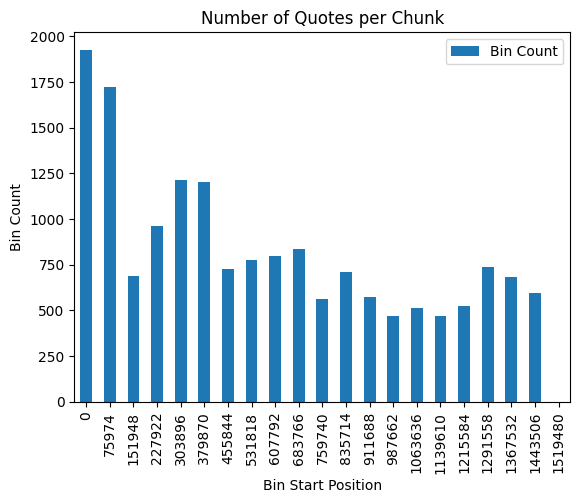

In [74]:


# Create a table of the bins



bins_table = pd.DataFrame({'Bin Start Position': list_of_start_positions, 'Bin Count': bins})
#print(bins_table)

# rawcounts table barplot

bins_table.plot(x='Bin Start Position', y='Bin Count', kind='bar')
plt.xlabel('Bin Start Position')
plt.ylabel('Bin Count')
plt.title('Number of Quotes per Chunk')
plt.show()





In [75]:
# definition of count_words_quoted_in_chunks(df, list_of_start_positions, txt):


def num_Words_in_Quotation( str):
   return  len(str.split())

def make_Quotation_str(location ,txt):
   return txt[location[0]:location[1]+1]  

def count_words_quoted_in_chunks(df, list_of_start_positions, txt):
    bins = [0] * len(list_of_start_positions)
    for location_list in df['Locations in A']:
        if isinstance(location_list, list) and len(location_list) > 0:
            for location in location_list: 
                quotation_str = make_Quotation_str(location, txt)
                num_words_words_quoted=  num_Words_in_Quotation(quotation_str)
                start_location=location[0]
                length_loop=len(list_of_start_positions)-1
                for j in range(length_loop):
                    if (start_location >= list_of_start_positions[j]) and (start_location < list_of_start_positions[j+1]):
                        bins[j] += num_words_words_quoted
                        break
                    else:
                        if j== length_loop-1:
                            bins[j+1] += num_words_words_quoted
                            break
    return bins




### 🗣️🚨  Barplot of  number of quoted words per chunk

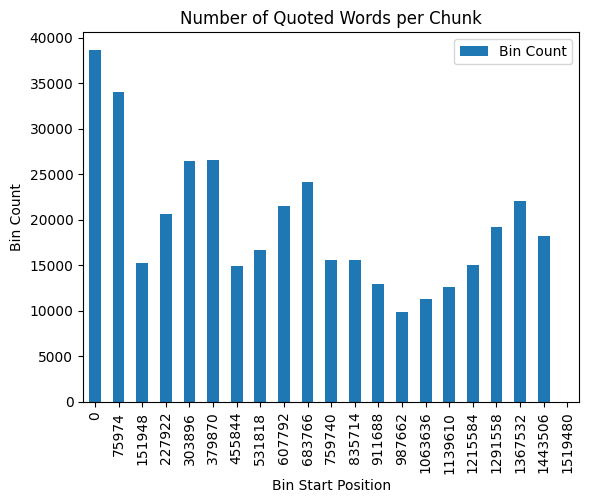

In [76]:
wordcount_bins= count_words_quoted_in_chunks(df, list_of_start_positions, txt)


wordcount_bins_table = pd.DataFrame({'Bin Start Position': list_of_start_positions, 'Bin Count': wordcount_bins})
#print(bins_table)

# rawcounts table barplot

wordcount_bins_table.plot(x='Bin Start Position', y='Bin Count', kind='bar')
plt.xlabel('Bin Start Position')
plt.ylabel('Bin Count')
plt.title('Number of Quoted Words per Chunk')
plt.show()


### Given the number of chunks, what are the startpositions of these chunks in the given text?




In [77]:

# given the number of chunks, numOfChun, 
# #make a list of startpositions of using the read source A txtfile:  txt


# list lowerbound of each chunk is defined

def make_list_startpositions(numOfChunks, txt):
    number_of_characters = len(txt)        
    list_of_start_positions = list(range(0,number_of_characters, int(number_of_characters/numOfChunks)))
    return list_of_start_positions




### creating a list of these startpostions

In [38]:
numOfChunks=20 

list_of_start_positions= make_list_startpositions(numOfChunks, txt)

df_Character_Indices = pd.DataFrame({'Index': range(len(list_of_start_positions)), 'Start Position': list_of_start_positions})


#Display the indexed table

print(df_Character_Indices,"\n")
print(f'number_of_characters: {number_of_characters}')
print(f'number of chunks: {numOfChunks}')  





NameError: name 'make_list_startpositions' is not defined

# Questions about distribution of quotations across source text

In [78]:
# ACTION: specify how many equally-sized chunks you want to divided the source text into

numOfChunks = 20

: 

## How many quoted words were detected from each chunk of the text?

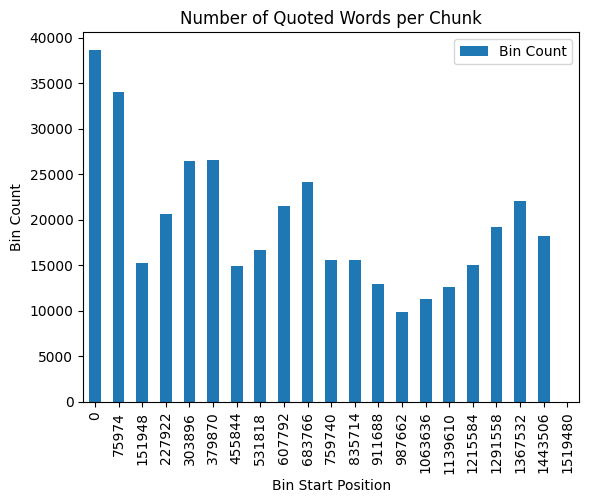

In [79]:
# 🗣️🚨 Generate a bar chart

wordcount_bins= count_words_quoted_in_chunks(df, list_of_start_positions, txt)


wordcount_bins_table = pd.DataFrame({'Bin Start Position': list_of_start_positions, 'Bin Count': wordcount_bins})
#print(bins_table)

# rawcounts table barplot

wordcount_bins_table.plot(x='Bin Start Position', y='Bin Count', kind='bar')
plt.xlabel('Bin Start Position')
plt.ylabel('Bin Count')
plt.title('Number of Quoted Words per Chunk')
plt.show()


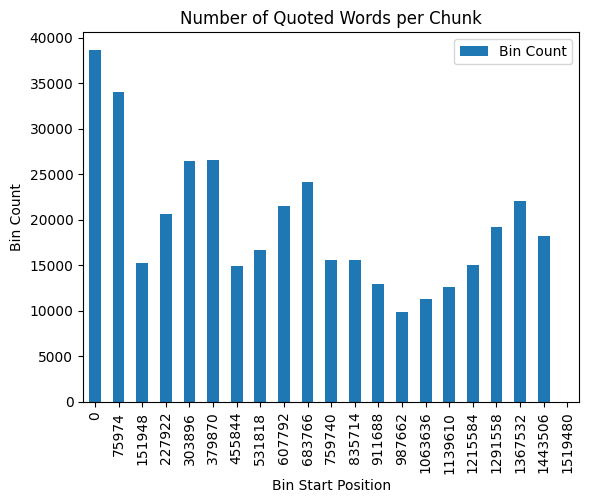

In [ ]:
wordcount_bins= count_words_quoted_in_chunks(df, list_of_start_positions, txt)


wordcount_bins_table = pd.DataFrame({'Bin Start Position': list_of_start_positions, 'Bin Count': wordcount_bins})
#print(bins_table)

# rawcounts table barplot

wordcount_bins_table.plot(x='Bin Start Position', y='Bin Count', kind='bar')
plt.xlabel('Bin Start Position')
plt.ylabel('Bin Count')
plt.title('Number of Quoted Words per Chunk')
plt.show()


## How does the number of items quoting each chunk change over the decades?

In [ ]:



# Generate a heat map - code for this already exists in Middlemarch notebook

 


## How does the number of quotations from each chunk change over the decades?

In [2]:
# 🗣️🚨 Generate a heat map

# Create wordcount_bins_table
#quoted_words_count_bins_table = pd.DataFrame({'Decade': sorted_unique_decades, 'Bin Count': quoted_words_count_bins_per_decade})

# Sort the table by 'Decade'
#quoted_words_count_bins_table = wordcount_bins_table.sort_values('Decade')

# Reset the index
#wordcount_bins_table = wordcount_bins_table.reset_index(drop=True)

# Display the table


# Calculate cquote_count_bins per decade

# Get unique values of 'Decade'
unique_decades = df['Decade'].unique()

sorted_unique_decades = np.sort(unique_decades)


quotes_count_bins_per_decade = {}  # Initialize the variable

for decade in sorted_unique_decades: 
    df_decade=df[df['Decade']== decade]
    quotes_count_bins_per_decade[decade] = count_words_quates_per_chunk(df_decade, list_of_start_positions)

# Create the dataframe
df_quotes_count_bins_per_decade = pd.DataFrame(list(quotes_count_bins_per_decade.items()), columns=['Decade', 'Quoted Words Count Bins'])

# Display the dataframe
df_quotes_count_bins_per_decade



# Convert the Quoted Words Count Bins column to a matrix
bins_matrix = df_quotes_count_bins_per_decade['Quoted Words Count Bins'].tolist()
# Assuming bins_matrix is a numpy array
bins_matrix = np.rot90(bins_matrix)

# Create a heatmap
sns.heatmap(bins_matrix, cmap='YlGnBu')

# Set the x-axis labels to the Decade values
plt.xticks(range(len(df_quotes_count_bins_per_decade)), df_quotes_count_bins_per_decade['Decade'])

plt.xticks(rotation=90)
# Set the y-axis label
plt.ylabel('Chunk ')

# Set the title
plt.title('Quototations per Chunk per Decade')

# Show the plot
plt.show()


# Create wordcount_bins_table
#quoted_words_count_bins_table = pd.DataFrame({'Decade': sorted_unique_decades, 'Bin Count': quoted_words_count_bins_per_decade})

# Sort the table by 'Decade'
#quoted_words_count_bins_table = wordcount_bins_table.sort_values('Decade')

# Reset the index
#wordcount_bins_table = wordcount_bins_table.reset_index(drop=True)

# Display the table
#wordcount_bins_table


NameError: name 'df' is not defined

## How does the number of words quoted from each chunk change over the decades?

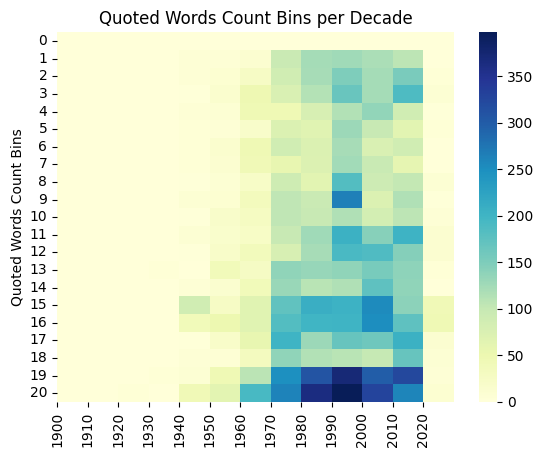

In [121]:
# 🗣️🚨 Generate a heat map


# create a heat map for the number of qouted words per chunk




# Calculate wordcount_bins per decade

# Get unique values of 'Decade'
unique_decades = df['Decade'].unique()
sorted_unique_decades = np.sort(unique_decades)
quoted_words_count_bins_per_decade = {}  # Initialize the variable

for decade in sorted_unique_decades: 
    df_decade=df[df['Decade']== decade]
    quoted_words_count_bins_per_decade[decade] = count_quotes_per_chunk(df_decade, list_of_start_positions)

# Create the dataframe
df_quoted_words_count_bins_per_decade = pd.DataFrame(list(quoted_words_count_bins_per_decade.items()), columns=['Decade', 'Quoted Words Count Bins'])

# Display the dataframe
df_quoted_words_count_bins_per_decade


import matplotlib.pyplot as plt

# Convert the Quoted Words Count Bins column to a matrix
bins_matrix = df_quoted_words_count_bins_per_decade['Quoted Words Count Bins'].tolist()
# Assuming bins_matrix is a numpy array
bins_matrix = np.rot90(bins_matrix)

# Create a heatmap
sns.heatmap(bins_matrix, cmap='YlGnBu')

# Set the x-axis labels to the Decade values
plt.xticks(range(len(df_quoted_words_count_bins_per_decade)), df_quoted_words_count_bins_per_decade['Decade'])

plt.xticks(rotation=90)
# Set the y-axis label
plt.ylabel('Quoted Words Count Bins')

# Set the title
plt.title('Quoted Words Count Bins per Decade')

# Show the plot
plt.show()

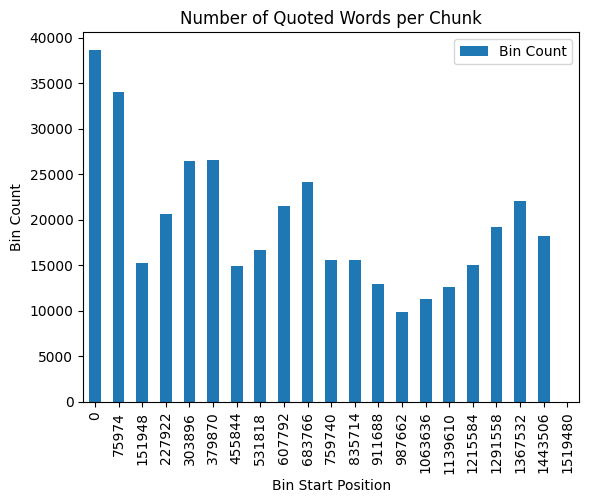

# Questions about frequently quoted passages

In [ ]:
# ACTION: for the cells that follow, do you want to see results for sentences or paragraphs?
# Remove the # next to whichever unit you want to use.

passageSize = "sentence"
#passageSize = "paragraph"

: 

In [ ]:
# ACTION: for the cells that follow, how many results do you want to see? (E.g. top 3, top 5, top 10)

numberOfPassages = 5

: 

## What are the most frequently quoted passages in the text?

In [ ]:
# Print list of sentences/paragraphs
# plus character index range, plus raw counts of number of quotations detected and number of items quoting
# If a sentence/paragraph is longer than 100 characters, print: first 50 chars "[...]" then last 50 chars.

: 

## Which frequently-quoted passages have been most consistently quoted over time?

In [ ]:
# Calculate items quoting a given sentence/paragraph as a percentage of all items from that decade,
# i.e. what percentage of all items in this decade quoted at least once from *this* sentence/paragraph?
# Calculate which sentences/paragraphs have both highest overall percentages for all decades *and* smallest range
# Question to discuss: how to balance these two factors of highest percentage/smallest range?

# Print list of sentences/paragraphs, with percentage of items quoting in each decade

: 

## Which frequently-quoted passages have undergone the largest change over time?

In [ ]:
# Calculate percentage of items quoting per decade as above
# Calculate largest range across decades

# Print list of sentences, with percentage of items quoting in each decade - bold the min and max value

: 

## Which passages have increased or decreased the most in the last decade (2010s)?

In [ ]:
# Calculate percentage of items quoting per decade as above
# Calculate average of all decades pre-2010s

# Largest increases = largest ranges where max value is 2010s and min value is avg of other decades
# Largest decreases = largest ranges where min value is in 2010s and max value is avg of other decades

# Print two lists: "Largest increases" and "Largest decreases".
# For each list, print sentences/paragraphs, values for 2010s and avg of other decades

: 

# Questions about a specific passage

In [ ]:
# ACTION: specify the passage you want to analyze using character indexes

specifiedPassage = [13543, 13678]

: 

In [ ]:
# Check the indices are in ascending size. If yes, print passage. If no, print error message.

: 

## What is the most frequently quoted portion of this passage?

In [ ]:
# Print the portion with highest raw count of quotations, followed by raw count and character indices

: 

## How has the quotation frequency for this passage changed over time?

In [ ]:
# Table and bar chart broken down by decade showing percentage of total quotations normalized for the decade

: 

## What are the items quoting from this passage?

In [ ]:
# Print table containing author name, title, year, journal title (isPartOf), and id (JSTOR URL) for each item
# Note: this code already exists in the notebook "find-passage-indices-and-items-quoting"

: 

In [ ]:
# Change these to desired chunk
# PT: from the notebook "find-passage-indices-and-items-quoting"
# PT: needs to be embedded and checked

num_characters_before_quote = 200
num_characters_after_quote = 750
decades_to_check = [2010, 2000, 1990, 1980, 1970, 1960, 1950]
list_of_VS_journals = ['Victorian Studies', 'George Eliot - George Henry Lewes Studies', 'Nineteenth-Century Fiction', 'Nineteenth-Century Literature', 'Dickens Studies Annual', 'Victorian Literature and Culture', 'Victorian Review', 'The George Eliot, George Henry Lewes Newsletter', 'Victorian Periodicals Review', 'Dickens Quarterly', 'Victorian Poetry', 'The Thomas Hardy Journal', 'The Gaskell Society Journal', 'The Gaskell Journal', 'Newsletter of the Victorian Studies Association of Western Canada', 'Dickens Studies Newsletter', 'Browning Institute Studies', 'Victorian Periodicals Newsletter', 'Carlyle Studies Annual', 'Conradiana', 'Tennyson Research Bulletin', 'The Conradian', 'The Hardy Society Journal', 'The Hardy Review', 'Studies in Browning and His Circle', 'Nineteenth-Century French Studies', 'The Wilkie Collins Journal', 'Carlyle Newsletter', 'The Wildean', 'Dickens Studies', 'Carlyle Annual', '19th-Century Music', 'The Trollopian', 'Conrad Studies']

# Create an empty list that we will populate with the contexts for quotations
context_chunks_for_quotations = []
context_chunks_ids = []
context_chunks_decade = []


# Loop over each of the start and end locations to produce a x-character chunk of context
for item in range(len(just_matches_df)):
    article_URL = just_matches_df['id'].loc[item]
    startandEndLocations = just_matches_df['Locations in B'].loc[item]
    print(article_URL)
    print(startandEndLocations[0])
    print(startandEndLocations[1])
    article_index = df_with_fulltexts[df_with_fulltexts['id'] == article_URL].index[0]
    print(article_index)
    article_title = df_with_fulltexts['title'].loc[article_index]
    print(article_title)
    article_decade = df_with_fulltexts['Decade'].loc[article_index]
    print(article_decade)
    article_journal = df_with_fulltexts['isPartOf'].loc[article_index]
    article_text = df_with_fulltexts['fullText'].loc[article_index]
    cleaned_article_text = Text(article_text, article_title)
    if article_journal in list_of_VS_journals:
    #if article_decade in decades_to_check:
        context_chunks_for_quotations.append((cleaned_article_text.text[startandEndLocations[0]-num_characters_before_quote:startandEndLocations[0]]) + "[...]" + (cleaned_article_text.text[startandEndLocations[1]:startandEndLocations[1]+num_characters_after_quote]))
        context_chunks_ids.append(df_with_fulltexts['id'].loc[article_index])
        context_chunks_decade.append(df_with_fulltexts['Decade'].loc[article_index])

: 

In [ ]:
# OPTIONAL: export this table as csv file

: 

# Questions about text quoted

## What is the distribution of word counts for the quotations detected?

In [ ]:
# Print mean length
# Generate box plot specifying max, min median, upper and lower quartiles

: 

## What are the most frequent words across all quoted passages?

In [ ]:
# List top 50 words with highest quotation frequencies

: 

## What are the most distinctive keywords for quoted passages compared to the rest of the text?

### The cell below uses tf-idf (https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to calculate distinctive keywords.

In [ ]:
# List 25 highest and 25 lowest values for tf-idf of quoted passages (multiplied by frequency) vs rest of text

: 

# Question about academic journals

Note: the questions that follow only apply to items published in academic journals (as opposed to book chapters). These items are not necessarily all journal *articles* - some may be reviews, editor's introductions, even tables of contents (although JSTOR is getting better at filtering out the latter).

## Which journals account for the largest number of items in the dataset?

In [ ]:
# Print table of top n journals plus their item frequencies

# Display table with top n journal counts

# ACTION: specify number of journals to display

numJournals = 30

# Generate table of top n journal counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["isPartOf"].value_counts()[0:numJournals])





: 

In [ ]:
# Print table of top n journals plus their word counts

: 

## How have the top journals changed over the decades?

In [ ]:
# For each decade, print a table of top n journals measured by number of items, plus the raw number of items

: 

## What disciplinary affiliations do the journals have based on JSTOR metadata?

In [ ]:
# ACTION: specify if you want to weight the results relative to number of items per journal

weightedByItems = True

# Bar chart for top 20 keywords

: 

## What disciplinary affiliations do the journals have based on keywords in titles?

In [ ]:
# ACTION: specify if you want to weight the results relative to number of items per journal

weightedByItems = True

# Bar chart for top 20 keywords

: 

In [ ]:

disciplinaryAffiliation = ""

# ACTION: specify whether you want to filter by JSTOR metadata or journal title - remove # next to one line below

#disciplinaryFilter = "metadata"
#disciplinaryFilter = "journalTitle"

# Generate side-by-side comparison (exact visualization TBD - stacked heat maps?)
# As sanity check, print list of all journal titles included in specified subset of corpus

: 

## Creating a bar plot of number of quotation items  
### filtered over the journal name 
### by a set of keywords

In [ ]:
from collections import Counter
# ACTION: specify you keyword or keywords here
# Multiple keywords can be separated with commas inside the brackets.


import matplotlib.pyplot as plt

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 

# Filter the rows
filtered_df = df[df['isPartOf'].apply(lambda x: any(value in x for value in filter_list) if x is not None else False)]
decade_Values_filtered=filtered_df['Decade']

counter_selected_Values = Counter(decade_Values_filtered) 


# Get the decades and their counts
decades = list(counter_selected_Values.keys())
counts_filtered = list(counter_selected_Values.values())

# Create a bar chart
plt.bar(decades, counts_filtered,width=3.5)

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Number of quotation articles')
plt.title('Number of quotation articles over decades,\n filtered by set of keywords')

#Show the plot
plt.show()
 


: 

 # Bar plot of  quotation items by decade 
 ### filtered by combination of keywords over the journal names 
 ###

In [ ]:
# Proposed filterlist over 'ísPartOf' column

# To Do: find a way to filter over combination of two elements in filterlist
# not yet thoroughly tested because I did not find relevant word snippets 
# with relevant overlap in df 'isPartOf'

filter_list=['Philosoph', 'Literar', 'Joyce','Soci', 'Anthropo'] 
number_of_word_items=len(filter_list)


# Strings is a lost of two items. Defaulkt taken outof  filter_list 

Strings=[filter_list[1], filter_list[2]]
# Create a new figure

import matplotlib.pyplot as plt

def make_overlap_Counter(Strings,df):
   filtered_df = df[df['isPartOf'].apply(lambda x: all(value in x for value in Strings) if x is not None else False)]
   decade_Values_filtered=filtered_df['Decade']
   counter_selected_Values=Counter(decade_Values_filtered)
   return counter_selected_Values
         
def make_bar_diagram_overlap(Strings,counter): 
   diagram_title= f"Quotations over Decades, filtered by '{Strings[0]}' and '{Strings[1]}'"
   
   counts_filtered = list(counter.values())
   decades = list(counter.keys())
   
   plt.figure()
   plt.bar(decades,counts_filtered,label= f" '{ Strings[0]}' and '{Strings[1]}'", width=3.5)   
   # Add labels and title
   plt.xlabel('Decade')
   plt.ylabel('Count')
   plt.title(diagram_title)
   # Show the plot
   plt.legend()
   plt.show()
   
my_Counter=make_overlap_Counter(Strings,df)

make_bar_diagram_overlap(Strings,my_Counter)


: 

## Create a bar plot of the number of items per decade, 
### filtered by a set of keywords.
### Each keyword filters separately for the number of items 

In [ ]:
# Proposed filterlist over 'ísPartOf' collumn

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 
number_of_word_items=len(filter_list)

Decade_Lowest=1900
Decade_Highest=2020

# Create a new figure

import matplotlib.pyplot as plt

def diagram_counts_with_keywords_in_isPartOf(filter_list,df):   
   # Create a new figure
   plt.figure()
   def make_list_of_Counters(filter_list,df):
      number_of_key_words=len(filter_list)
      List_of_Counters=[] 
      for i in range(number_of_key_words):
         String = filter_list[i]
         filtered_df = df[df['isPartOf'].str.contains(String, na=False)]   
         decade_Values_filtered=filtered_df['Decade']
         counter_selected_Values=Counter(decade_Values_filtered)
         List_of_Counters.append(counter_selected_Values )     
         decades = list(counter_selected_Values.keys())
      return List_of_Counters   
         
   def make_bar_diagrams(filter_list, List_of_Counters): 
      number_of_word_items=len(List_of_Counters)
      for i in range(number_of_word_items):
         String = filter_list[i]
         
         counts_filtered = list(List_of_Counters[i].values())
      
         #List_of_Counters=make_list_of_Counters(filter_list,df)
         decades = list(List_of_Counters[i].keys())
         counts_filtered = list(List_of_Counters[i].values())
         # Create a bar chart
         plt.bar(decades, counts_filtered, alpha=0.7,label= String, width=3.5)   
   List_of_Counters=make_list_of_Counters(filter_list,df)
   make_bar_diagrams(filter_list,List_of_Counters)
   # Add labels and title
   plt.xlabel('Decade')
   plt.ylabel('Count')
   plt.title('Number of quotation items over decades, filtered')
   # Show the plot
   plt.legend()
   plt.show()
   
   
   
diagram_counts_with_keywords_in_isPartOf(filter_list,df) 

: 

## How do journals from a specified list of titles relate to the rest of the results?

In [ ]:
# ACTION: create a text (.txt) file in the same folder and list the journal titles, each on a new line
# ACTION: specify the filename of that text file below

journalTitles = ""

# Generate side-by-side comparison (exact visualization TBD - stacked heat maps?)

: 

## What are the most distinctive keywords in quotations from specified journals compared to the rest of the corpus?

In [ ]:
# List 25 highest and 25 lowest values for tf-idf of keywords in quotations from
# specified journals (three options for defining - by JSTOR metadata, by title keyword, by specified list)
# vs in quotations from rest of corpus (multiplied by frequency in both cases)

: 

# Questions about change over time of journal  items 
# with or without defining the categories or journal naming snippets  

: 

### Bar plot with a number of journal categories with the most items quoting the source  

### In the vertical axes: number of items

In [ ]:
# OPTIONAL : set top_N_sourceCategorie entries 

from itertools import chain
from collections import Counter

# Number of sourceCategory entries with highest counts of quotation articles of the primary text 
top_N_sourceCategory_entries=10




# Filter out None values
df_filtered = df[df['sourceCategory'].notna()]

# Flatten the lists in 'sourceCategory'
flattened_list = list(chain.from_iterable(df_filtered['sourceCategory']))

# Count the occurrences of each value
counts = Counter(flattened_list)

# Convert the result to a DataFrame
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Reset the index
counts_df.reset_index(inplace=True)

# Rename the columns
counts_df.columns = ['Value', 'Count']
#print(counts_df)
#counts_df.plot(x='Value', y='Count', kind='bar')
counts_df_sorted = counts_df.sort_values(by='Count', ascending=False)

# use the n= 10 first, most promenent itens

counts_df_sorted=counts_df_sorted.iloc[:top_N_sourceCategory_entries-1]
counts_df_sorted.head()

#print(counts_df_sorted)
plot1=counts_df_sorted.plot(x='Value', y='Count', label='Number of articles', kind='bar')

plot1.set_title(f'Top {top_N_sourceCategory_entries} categories of journals with highest number of quotation articles')
plot1.set_xlabel('Category')
plot1.set_ylabel('Number of articles')



: 

: 

: 

In [ ]:
# TBD

# Note: For any question involving change over time,
# decide between raw count and normalized for total items per decade

: 

: 

# Code from previous version of Notebook starts below

In [ ]:
# Display table with top n journal counts

# ACTION: specify number of journals to display

numJournals = 10

# Generate table of top n journal counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["isPartOf"].value_counts()[0:numJournals])


: 

### preparations for reading the source A textfile

In [ ]:
# 🗣️🚨 definining preparations to find the source S Textfile  
# asuming naming conventions are respected 

from pathlib import Path

def find_SourceText(project_data):
  #source-dit is a path object 
  source_dir=project_data.source_dir
  project_name= project_data.project_name
  if source_dir.exists():
    # Specify the file pattern to search for
    matching_pattern = f"*{project_name}*"
  matching_pattern = f"*{project_name}*text.txt*"

  matching_files_list = list(source_dir.glob(matching_pattern))
  for file in matching_files_list:
    print(file) 
  if len(matching_files_list)==0:
    print('The SourceText does not exist')
  elif not len(matching_files_list)==1:
    print('There are more SourceTexts.  Remove files before contuimuing')
    matching_files_list= []
                          
  return matching_files_list[0]  
  
        

: 

In [ ]:
# 🗣️🚨 preparations to find and read the Asource  Textfile  


source_Text= find_SourceText(my_project_data)

with open(source_Text,"r", encoding='utf-8' ) as f: 
   txt = f.read()


textALength = len(txt)
print(textALength) 


: 

## Length of ASource text 

In [ ]:
textALength = len(txt)
print(textALength)

: 

In [ ]:
# Make an empty array the size of the text

tally = np.zeros(textALength)
#tally = [0] * textALength

# Read the matched locations from the results dataset, and literally evaluate them into lists. 

locationsInA = df['Locations in A']

# Tally up every time a letter in the text is quoted. 
for article in locationsInA: 
    for locRange in article: 
         for i in range(locRange[0], min(locRange[1]+1, len(tally))):
                tally[i] += 1

: 

In [ ]:
# Identify top 10 highest frequencies in descending order
topFreqs = list(set(tally))[:-21:-1]

print(topFreqs)

: 

In [ ]:
quotedRange = np.where(tally == 12)[0].tolist()
print(quotedRange)

: 

In [ ]:
print(txt[105054:105973])

: 

In [ ]:
if quotedRange[-1] - quotedRange[0] +1 == len(quotedRange):
    print("Continuous range")
else:
    print("Multiple ranges detected")

: 

In [ ]:
for i in range(2, len(quotedRange)):
    if quotedRange[i] - quotedRange[i-1] != 1:
        print("Multiple ranges detected:")
        splitPoint = i
        firstQuot = quotedRange[:splitPoint]
        secondQuot = quotedRange[splitPoint:]
        print(txt[firstQuot[0]:firstQuot[-1]])
        print(txt[secondQuot[0]:secondQuot[-1]])
        break
else:
    print("Continuous range")

: 

In [ ]:
for range in topFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: {quotedExcerpt}\n")

: 

In [ ]:
# Identify selected frequencies in descending order
selectedFreqs = list(set(tally))[-22:-9]

print(selectedFreqs)

: 

In [ ]:
for range in selectedFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: indices  
          {quotedExcerpt}\n")

: 

In [ ]:
# Get page locations
pageMatches = txt.split('~')
pageMatches = [match.strip() for match in pageMatches]
len(pageMatches)

: 

## How many articles do we have published in each year? 

In [ ]:
alt.Chart(df).mark_bar().encode(x='Year', y='count()').properties(width=1000)

: 

# Find all articles quoting a given range

In [ ]:
df[df["Locations in A"].astype(str).str.contains("157027") == True]

: 

In [ ]:
df2["Locations in A"].iloc[1]

: 

# Divide text into chunks

In [ ]:
def divideBySections(amount):
    text_occurrence, rangeBreakdown, xLabels = {}, [], []

    for i in range(0, amount):
        text_occurrence[str(i)] = 0
        rangeBreakdown.append(((textALength/amount)*(i), (textALength/amount)*(i+1)))
        xLabels.append(f"{i+1}")

    return text_occurrence, rangeBreakdown, xLabels

def plotPortionsOfQuotes(amount):

    text_occurrence, rangeBreakdown, xLabels = divideBySections(amount)

    for index, row in df.iterrows():
        for (quot_start,quot_end) in row['Locations in A']:
            for index,values in enumerate(rangeBreakdown):
                if (values[0]<=quot_start<=values[1]):
                    text_occurrence[str(index)] += 1

    total_occ = sum(text_occurrence.values())
    print(total_occ)
    for (key, val) in text_occurrence.items():
        print(key,val)


    plt.figure(facecolor='white')
    plt.bar(range(len(text_occurrence)), list(text_occurrence.values()),tick_label=xLabels)

    plt.xlabel("Segment of text")
    plt.ylabel("Number of quotations")
    plt.rcParams["figure.figsize"] = (30,10)
    plt.rcParams.update({'font.size': 18})
    plt.title("Number of quotations per segment of text")

    plt.show()


distributionCount = 10
plotPortionsOfQuotes(distributionCount)

: 

# Average Numbers of Quoted Words Per Item

In [ ]:
df['Quoted Words'].describe()

: 

In [ ]:
articlesWithMatches['Quoted Words'].describe()

: 

In [ ]:
len(df[df['Quoted Words'] > 0])

: 

In [ ]:
articlesWithMatches['Quoted Words'].hist()

: 

## Stats about Wordcounts

Average number of words per match, per item: 

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).head()

: 

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).describe()

: 

#### Functions for extracting wordcounts, numbers of quotations for diachronic and synchronic analysis

In [ ]:
def diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations, useWordcounts=True, normalize=True):
    """ Turning on useWordcounts makes it so that it's weighted by wordcount. 
    Turning it off uses raw numbers of quotations. """
    decades = np.arange(decades[0], decades[1], 10)
    # Make a dictionary of decades. 
    # Values are a list of locations.  
    decadeDict = {}
    for i, row in df.iterrows():
        decade = row['Decade']
        locationsAndWordcounts = row['Locations in A with Wordcounts']
        if decade not in decadeDict: 
            decadeDict[decade] = locationsAndWordcounts.copy()
        else: 
            decadeDict[decade] += locationsAndWordcounts.copy()
    # Grab the beginnings of quotes. 
    decadeStartsWeights = {decade: [(item[0][0], item[1]) 
                                    for item in loc] 
                    for decade, loc in decadeDict.items()}
    if useWordcounts: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  weights=[loc[1] for loc in locations],
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    else: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    decadesDF = pd.DataFrame(decadesBinned).T
    #Normalize
    if normalize: 
        decadesDF = decadesDF.div(decadesDF.max(axis=1), axis=0)
    return decadesDF

def countWords(locRange): 
    """ Counts words in middlemarch, given character ranges. """
    chunk = mm[locRange[0]:locRange[1]]
    return len(chunk.split())

def totalWords(locRangeSet): 
    """ Counts total words in a list of location ranges. """
    return sum([countWords(locRange) for locRange in locRangeSet])    
    
def countsPerSet(locRangeSet): 
    """ Returns an augmented location range set that includes word counts. """
    return [(locRange, countWords(locRange))
             for locRange in locRangeSet]
    
def extractWordcounts(locsAndWordcounts): 
    """ 
    Takes pairs of location ranges and wordcounts, 
    and returns just the wordcounts. 
    """
    return [item[1] for item in locsAndWordcounts 
            if len(locsAndWordcounts) > 0]

def synchronicAnalysis(df, bins=chapterLocations, useWordcounts=True): 
    locs = df['Locations in A'].values
    locCounts = [(loc, countWords(loc)) for locSet in locs
              for loc in locSet]
    starts = [loc[0][0] for loc in locCounts]
    counts = [loc[1] for loc in locCounts]
    if useWordcounts: 
        binned = np.histogram(starts, bins=bins, 
                              weights=counts, range=(0, textALength))
    else: 
        binned = np.histogram(starts, bins=bins, 
                              range=(0, textALength))
    binnedDF = pd.Series(binned[0])
    return binnedDF

def plotDiachronicAnalysis(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Chapter')
    plt.gca().set_xlim((0, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()
    
def plotSynchronicAnalysis(s, useWordcounts=True): 
    ax = s.plot(kind='bar')
    ax.set_xlabel('Chapter')
    if useWordcounts: 
        ax.set_ylabel('Number of Words Quoted')
    else: 
        ax.set_ylabel('Number of Quotations')
        
def plotSynchronicAnalysisHeatmap(s, useWordcounts=True): 
    vec1=synchronicAnalysis(df, useWordcounts=False)
    fig, ax = plt.subplots()
    sns.color_palette("magma")
    sns.heatmap([vec1])
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Number of Quotations')
    
def plotDiachronicAnalysisBubble(df, save=False, reverse=False):
    ylabels = [str(int(decade)) for decade in df.index] + ['2020'] 
    alt.Chart(df).mark_circle().encode(
    x='Chapter',
    y='Decade',
    size='sum(count):Q'
)
)

: 

In [ ]:
df['Quoted Words'] = df['Locations in A'].apply(totalWords)

: 

In [ ]:
df['Locations in A with Wordcounts'] = df['Locations in A'].apply(countsPerSet)

: 

In [ ]:
# Verify that the diachronic wordcounts are the same as the synchronic wordcounts
decadeSums = diachronicAnalysis(df, decades=(1700, 2020), useWordcounts=True, normalize=False).sum(axis=1)
decadeSums.sum()

: 

In [ ]:
chapterSums = synchronicAnalysis(df)
chapterSums.sum()

: 

# Quotation Length Statistics

In [ ]:
df['Wordcounts'] = df['Locations in A with Wordcounts'].apply(extractWordcounts)

: 

In [ ]:
wordcounts = []
for countSet in df['Wordcounts'].values: 
    for count in countSet: 
        wordcounts.append(count)

: 

In [ ]:
pd.Series(wordcounts).hist()

: 

# Number of Quotes (and words Quoted) by Chapter

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df))

: 

In [ ]:
synchronicAnalysis(df, useWordcounts=True).to_csv('../papers/spring2017-middlemarch-paper/data/num-words-quoted-per-chapter.csv')

: 

### Total number of matches

In [ ]:
allMatches = []
for group in df['Locations in A'].values: 
    for pair in group: 
        allMatches.append(pair)

: 

In [ ]:
len(allMatches)

: 

: 

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df, useWordcounts=False), useWordcounts=False)

: 

In [ ]:
quotationsPerChapter = synchronicAnalysis(df, bins=chapterLocations, useWordcounts=False)
quotationsPerChapter

: 

In [ ]:
quotationsPerChapter = pd.DataFrame(quotationsPerChapter, index=range(0,88), columns=['Number of Quotations'])
quotationsPerChapter['Chapter'] = range(0, 88)
quotationsPerChapter

: 

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size='Number of Quotations:Q').properties(width=1000, height=150)

: 

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000, height=150)

: 

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerChapter).mark_circle().encode(x=alt.X('Chapter:Q', axis=alt.Axis(title="Chapter", tickMinStep=5,
                                       labelOverlap=False,labelAngle=0)), 
size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000,height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

: 

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(y='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=150)

: 

## Quotations Per Book

In [ ]:
quotationsPerBook = synchronicAnalysis(df, bins=bookLocations, useWordcounts=False)
quotationsPerBook

: 

In [ ]:
quotationsPerBook = pd.DataFrame(quotationsPerBook, index=range(1,9), columns=['Number of Quotations'])
quotationsPerBook['Book'] = range(1, 9)
quotationsPerBook

: 

In [ ]:
alt.Chart(quotationsPerBook).mark_bar().encode(x='Book:O', y='Number of Quotations:Q').properties(width=500)

: 

In [ ]:
alt.Chart(quotationsPerBook).mark_circle().encode(x='Book:O', size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

: 

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerBook).mark_circle().encode(x=alt.X('Book:O', axis=alt.Axis(title="Book", labelAngle=0,)), 
size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

: 

## Raw Number of Quotations Per Chapter

In [ ]:
# Get the raw number of quotations per chapter
# synchronicAnalysis(df, useWordcounts=False).to_csv('../papers/spring2017-middlemarch-paper/data/num-quotations-per-chapter.csv')

: 

In [ ]:
# Adjusted for the number of words in each chapter
ax = (synchronicAnalysis(df) / chapterLengthsSeries).plot(kind='bar')
ax.set_xlabel('Chapter')
ax.set_ylabel('Words Quoted, Normalized')

: 

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations).sort_index())

: 

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

: 

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.color_palette("magma")
sns.heatmap([vec1])
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

: 

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
# INVERTED COLOR SCHEMA
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.heatmap([vec1], cmap = 'magma_r')
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

: 

In [ ]:
diaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index()

: 

In [ ]:
diaDFquoteOnly = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()

: 

In [ ]:
plotDiachronicAnalysisBubble(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

: 

In [ ]:
synDF = synchronicAnalysis(df, useWordcounts=False)

: 

In [ ]:
synDF.index.name = 'chapter'

: 

In [ ]:
synDF

: 

# By Journal

In [ ]:
# Look at the top journals. 
journalStats = df['journal'].value_counts()
journalStats[:10]

: 

In [ ]:
journalList = journalStats.index

: 

Compare the specialist journal, "George Eliot - George Henry Lewes Studies," with all other journals. 

In [ ]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']
otherJournals = df.loc[df['journal'] != 'George Eliot - George Henry Lewes Studies']

: 

In [ ]:
# Normalize
geDF = synchronicAnalysis(geJournals)
otherDF = synchronicAnalysis(otherJournals)
normGE = geDF.div(geDF.max())
normOther = otherDF.div(otherDF.max())

: 

In [ ]:
fig = plt.figure()
ax = (normGE - normOther).plot(kind='bar')
fig.add_subplot(ax)
ax.set_xlabel('Chapter')
ax.set_ylabel('Specialization Index')
# Save a big version for publication. 
fig.savefig('specialization.png', bboxinches='tight', dpi=300)

: 

In [ ]:
journals = pd.DataFrame({title: synchronicAnalysis(df.loc[df['journal'] == title]) for title in journalList }).T

: 

In [ ]:
cutoff = 1500
topJournals = journals.loc[journals.sum(axis=1) > cutoff]
otherJournals = journals.loc[journals.sum(axis=1) < cutoff]
topJournals.loc['Other'] = otherJournals.sum()

: 

In [ ]:
topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')

: 

In [ ]:
ax = topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')
fig = ax.get_figure()
fig.savefig('synchronic-journals.png', bboxinches='tight', dpi=300)

: 

In [ ]:
# Print the total number of journals
len(journalStats)

: 